<a href="https://colab.research.google.com/github/hqu/antivax_network_analysis/blob/main/network_analysis_YouTube_female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import pandas as pd
import urllib.parse

In [ ]:
gsheetid = "1Xy2seTRNqi2BrVPlwyTWO-iMRutUvHi2-y4ZIAHG-Wo"
sheet_name = "female"
sheet_name_encoded = urllib.parse.quote(sheet_name)
gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid, sheet_name_encoded)
df = pd.read_csv(gsheet_url)
df = df.dropna(axis=1, how='all')


In [ ]:

df

,User Id,Channel Name,Channel_Url,Count
0,0a2b3eb1-b69f-4de0-9fd7-39ca23102155,hungrychad,https://www.youtube.com/channel/UCD-MuyaMBzRh2...,2
1,0a2b3eb1-b69f-4de0-9fd7-39ca23102155,Lifeformed,https://www.youtube.com/channel/UCp7UpJz4wz2AT...,2
2,0a2b3eb1-b69f-4de0-9fd7-39ca23102155,Mekkah Dee,https://www.youtube.com/channel/UCseSrjMOT33Iy...,3
3,0a2b3eb1-b69f-4de0-9fd7-39ca23102155,Nobuo Uematsu - Topic,https://www.youtube.com/channel/UCZOd9KDD58MZR...,2
4,0a2b3eb1-b69f-4de0-9fd7-39ca23102155,SQUARE ENIX MUSIC - Topic,https://www.youtube.com/channel/UCP1gKdRIuuv23...,2
...,...,...,...,...
232,fc7fcbd3-fa78-4092-954e-21edb548fee3,WPLG Local 10,https://www.youtube.com/channel/UCgVZ0mrM3liHN...,2
233,fc7fcbd3-fa78-4092-954e-21edb548fee3,Zaynah Bear,https://www.youtube.com/channel/UCJhvgk-AkceyM...,2
234,fd8463ec-acd7-4bdc-bb81-07dbc36d9888,1theK (원더케이),https://www.youtube.com/channel/UCweOkPb1wVVH0...,2
235,ff19dd2d-b03c-4616-92ef-54ce21fafe9a,Mortis Media,https://www.youtube.com/channel/UCCCLGjb5b9_0M...,2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

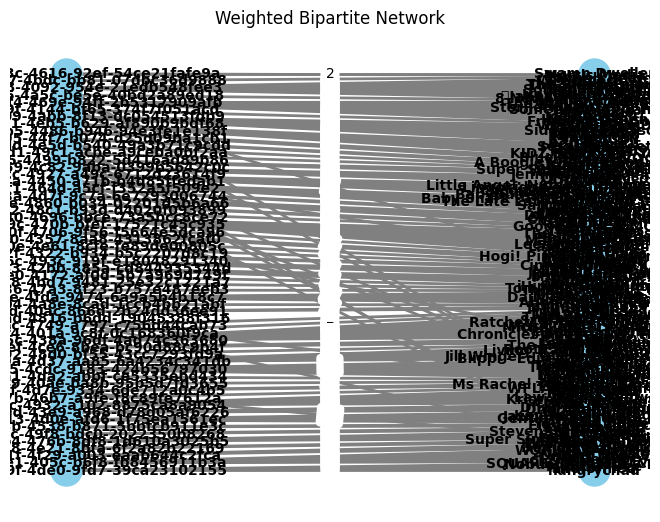

In [ ]:
# prompt: create a weighted bipartite network using df and visualize it

import networkx as nx
import matplotlib.pyplot as plt

# Assuming df has columns 'source', 'target', and 'weight'
# Create a weighted bipartite graph
graph = nx.Graph()
for index, row in df.iterrows():
    graph.add_edge(row['User Id'], row['Channel Name'], weight=row['Count'])

# Get node positions for bipartite layout
pos = nx.bipartite_layout(graph, df['User Id'].unique())

# Draw the graph
nx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight='bold', width=2, edge_color='gray')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Display the plot
plt.title("Weighted Bipartite Network")
plt.show()


In [ ]:
# prompt: use networkx to project graph to a unipartite network of Channel Name

# Project the bipartite graph to a unipartite network of Channel Names
channel_graph = nx.bipartite.weighted_projected_graph(graph, df['Channel Name'].unique())

# Get node positions for spring layout
#pos_channel = nx.spring_layout(channel_graph)

# Draw the projected graph
#nx.draw(channel_graph, pos_channel, with_labels=True, node_size=500, node_color="lightgreen", font_size=8, font_weight='bold', width=2, edge_color='gray')

# Draw edge labels (weights)
#edge_labels_channel = nx.get_edge_attributes(channel_graph, 'weight')
#nx.draw_networkx_edge_labels(channel_graph, pos_channel, edge_labels=edge_labels_channel)


# Display the plot
#plt.title("Projected Unipartite Network (Channel Names)")
#plt.show()


In [ ]:
# prompt: for each nodes in channel_graph look up the Channel Url and add it as an attribute

# Assuming df has a column 'Channel Url' corresponding to the Channel Name
# Add Channel Url as an attribute to each node in channel_graph

for node in channel_graph.nodes():
    channel_url = df[df['Channel Name'] == node]['Channel_Url'].iloc[0]
    channel_graph.nodes[node]['Channel Url'] = channel_url
    print(f"Node: {node}, Channel URL: {channel_url}")


Node: hungrychad, Channel URL: https://www.youtube.com/channel/UCD-MuyaMBzRh2NV0CuBi4RA
Node: Lifeformed, Channel URL: https://www.youtube.com/channel/UCp7UpJz4wz2ATmv7SV7-l1Q
Node: Mekkah Dee, Channel URL: https://www.youtube.com/channel/UCseSrjMOT33IynASXg7oDWw
Node: Nobuo Uematsu - Topic, Channel URL: https://www.youtube.com/channel/UCZOd9KDD58MZR13UbbtdrpQ
Node: SQUARE ENIX MUSIC - Topic, Channel URL: https://www.youtube.com/channel/UCP1gKdRIuuv23t4_UlnE6wA
Node: ChrisBrownVEVO, Channel URL: https://www.youtube.com/channel/UCm1dsgJNnhaLkY3uAdqN4mA
Node: G Herbo, Channel URL: https://www.youtube.com/channel/UCV0pIPt5HFfulonNog3cz1A
Node: Gucci Mane, Channel URL: https://www.youtube.com/channel/UCSugZEYrWbzqIWGD195V-YA
Node: King Von, Channel URL: https://www.youtube.com/channel/UC47kJWRBD-NREBvmBg5kWeA
Node: Nipsey Hussle, Channel URL: https://www.youtube.com/channel/UCm1s2VS9BdyXL9FU4a-W_cQ
Node: Summer Walker, Channel URL: https://www.youtube.com/channel/UCSpNS4dJ8wIScwMqatIdiQw
N

In [ ]:
# prompt: export the edgelist with weight as a CSV file

import pandas as pd

# Assuming 'channel_graph' is your projected unipartite graph
edge_list = list(channel_graph.edges(data=True))

# Extract source, target, and weight into a list of lists
edge_data = [[edge[0], edge[1], edge[2]['weight']] for edge in edge_list]

# Create a Pandas DataFrame
df_edgelist = pd.DataFrame(edge_data, columns=['Source', 'Target', 'Weight'])

# Save the DataFrame to a CSV file
df_edgelist.to_csv('channel_edgelist_female.csv', index=False)

from google.colab import files
files.download('channel_edgelist_female.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: export channel_graph nodes, include the channel url as the second column

import pandas as pd

# Assuming 'channel_graph' is your projected unipartite graph and has the 'Channel Url' attribute
node_data = []
for node in channel_graph.nodes(data=True):
    node_name = node[0]
    channel_url = node[1].get('Channel Url', 'N/A')  # Handle cases where 'Channel Url' might be missing
    node_data.append([node_name, channel_url])

# Create a DataFrame from the node data
node_df = pd.DataFrame(node_data, columns=['Channel Name', 'Channel Url'])

# Save the DataFrame to a CSV file
node_df.to_csv('channel_nodes_female.csv', index=False)

files.download('channel_nodes_female.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# See the network visualization:
### https://public.flourish.studio/visualisation/22968355/

#END